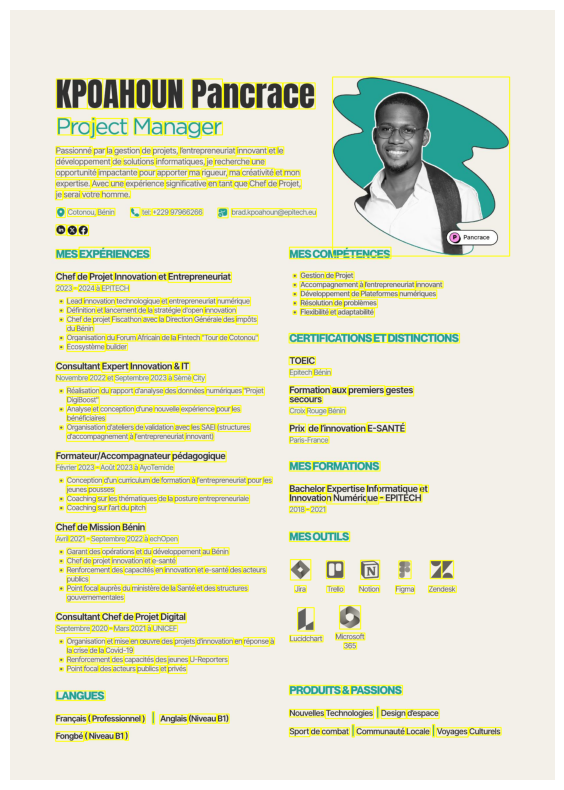

In [83]:
from pdf2image import convert_from_path
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pytesseract

filename = '../Data/CV-Pancrace KPOAHOUN.pdf'
images = convert_from_path(filename)

def pdf_to_image(pdf_file):
    images = convert_from_path(pdf_file)
    return images

images = pdf_to_image(filename)

def save_images(images, filename):
    save_images_name = []
    for i in range(len(images)):
        main = filename.replace('.pdf', "").replace(" ", "_")
        images[i].save(f'{main}_page'+ str(i) +'.jpg', 'JPEG')
        save_images_name.append(f'{main}_page'+ str(i) +'.jpg')
    return save_images_name

save_images_name = save_images(images, filename)

def draw_rectangles(images, rectangles, color=(0, 255, 0), thickness=2):
    for (x, y, w, h) in rectangles:
        cv2.rectangle(image, (x, y), (x+w, y+h), color, thickness)
    return image

# rgb color
# red = (255, 0, 0)
# green = (0, 255, 0)
# blue = (0, 0, 255)
# yellow = (255, 255, 0)
# magenta = (255, 0, 255)
# cyan = (0, 255, 255)
# black = (0, 0, 0)
# white = (255, 255, 255)
def segment_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=1)
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rectangles = [cv2.boundingRect(contour) for contour in contours]
    return draw_rectangles(image.copy(), rectangles, color=(0, 255, 255), thickness=2)

def plot_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

for i in save_images_name:
    image = cv2.imread(i)
    segmented_image = segment_image(image)
    plot_image(segmented_image)

# print(pytesseract.image_to_string(cv2.imread(save_images_name[0])))
# print(pytesseract.image_to_string(cv2.imread(save_images_name[1])))

In [84]:

from pdf2image import convert_from_path
import cv2
import os
import pytesseract

def pdf_to_image(pdf_file):
    images = convert_from_path(pdf_file)
    return images

def save_images(images, filename):
    save_images_name = []
    for i in range(len(images)):
        main = filename.replace('.pdf', "").replace(" ", "_")
        images[i].save(f'{main}_page'+ str(i) +'.jpg', 'JPEG')
        save_images_name.append(f'{main}_page'+ str(i) +'.jpg')
    return save_images_name

def delete_image(images):
    for i in images:
        os.remove(i)
    return None

def ocr_image(images):
    texts = []
    for image in images:
        text = pytesseract.image_to_string(cv2.imread(image))
        texts.append(text)
    return texts

filename = '../Data/DOSSEH_SHALOM_CV.pdf'
images = convert_from_path(filename)
save_images_name = save_images(images, filename)
images = pdf_to_image(filename)
texts = ocr_image(save_images_name)

for text in texts:
    print(text)

delete_image(save_images_name)

Shalom DOSSEH

shalom.dosseh@epitech.eu [] +22955202424 [i https://www.linkedin.com/in/shalom-dosseh-4a484a262/ ©) https://github.com/AnalyticAce

APROPOS

Data Analyste/Business avec une solide base en analyse technique et business. Possédant une maitrise avancée des outils d’analyse de

données tels que Excel, SQL, Python, R et Tableau. Capable de transformer des données complexes en informations commerciales utiles.
Reconnu pour son attention aux détails et sa capacité a identifier les besoins d'affaire. Cherche a utiliser ces compétences pour faciliter la

prise de décision basée sur les données.

EXPERIENCES

Data Analyst
Gozem Africa - First African Super App September 2023 - January 2024, Benin
+ Pilote la prise de décision grace a une analyse de données exhaustive.

+ Surveille les indicateurs de performance avec des tableaux de bord en temps réel.

+ Assure l’intégrité des données par des verifications réguliéres et la détection proactive d’anomalies.

+ Anticipe les tendances